# Team Members
   Abhisekhar Bharadwaj Gandavarapu <br>
   Taylor Fisher<br>
   Ayan Gautam<br>

## Import Libraries and Read CSV File

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Load datasets
taxi_data = pd.read_csv("Taxi_Data.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")


print(taxi_data.head())
print(customer_data.head())
print(city_data.head())
print(transaction_data.head())

   Transaction ID  Date of Travel   Company        City  \
0        10000011           42377  Pink Cab  ATLANTA GA   
1        10000012           42375  Pink Cab  ATLANTA GA   
2        10000013           42371  Pink Cab  ATLANTA GA   
3        10000014           42376  Pink Cab  ATLANTA GA   
4        10000015           42372  Pink Cab  ATLANTA GA   

   Distance Travelled(KM)  Price Charged  Cost of Trip  
0                   30.45         370.95       313.635  
1                   28.62         358.52       334.854  
2                    9.04         125.20        97.632  
3                   33.17         377.40       351.602  
4                    8.73         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
             City   P

## Taylor's Section

Text(0.5, 1.0, 'Distance of Taxi Ride and Cost of Trip')

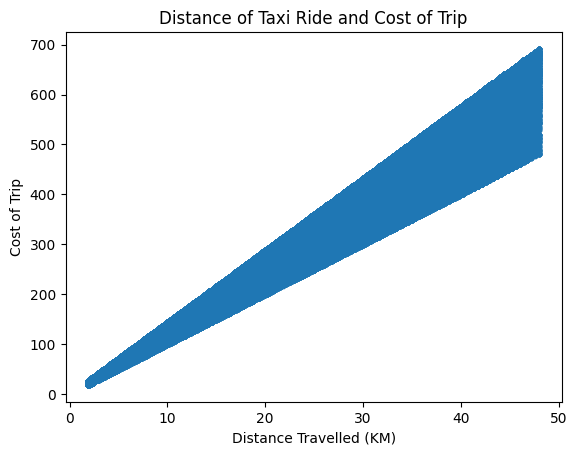

In [4]:
#What is the relationship between distance traveled and cost of the trip?
date = taxi_data['Distance Travelled(KM)']
distance = taxi_data['Cost of Trip']
plt.scatter(date, distance, s=10)
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Cost of Trip')
plt.title('Distance of Taxi Ride and Cost of Trip')
#while the relationship is a positive correlation as expected, it appears that as the distance traveled increases the cost of trip ranges more

Text(0.5, 1.0, 'Comparing Income with Disance Travelled in a Taxi')

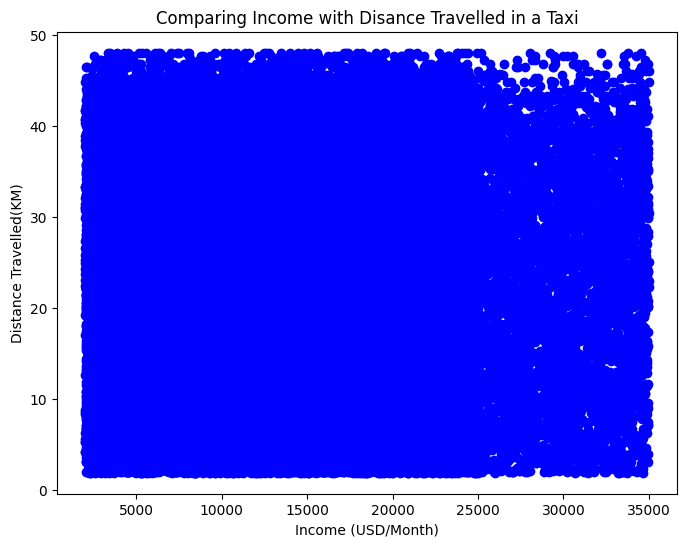

In [5]:
#Is there a correlation between income and distance travelled in taxi?
num_rows = min(len(customer_data), len(taxi_data))
x = customer_data['Income (USD/Month)'].iloc[:num_rows]
y = taxi_data['Distance Travelled(KM)'].iloc[:num_rows]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Distance Travelled(KM)')
plt.title('Comparing Income with Disance Travelled in a Taxi')

#There does not seem to be a correlation between a person's income and the distance they travel in a taxi

Text(0.5, 1.0, 'Comparing Age with Spending on Taxis')

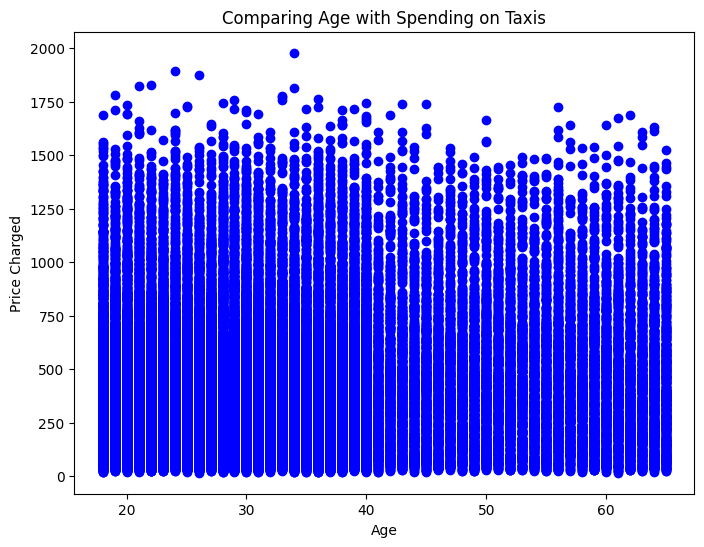

In [6]:
#Is there a correlation between age and spending on taxi services?
num_rows = min(len(customer_data), len(taxi_data))
x = customer_data['Age'].iloc[:num_rows]
y = taxi_data['Price Charged'].iloc[:num_rows]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.xlabel('Age')
plt.ylabel('Price Charged')
plt.title('Comparing Age with Spending on Taxis')
#While there is no clear correlation between age and spending on taxi services, there down seem to be a very slight downward trend. It appears that younger people tend to spend a little more on taxis compared to older people.

## Abhi's Section

### What is the profitability of each cab company, and how does it vary by city?

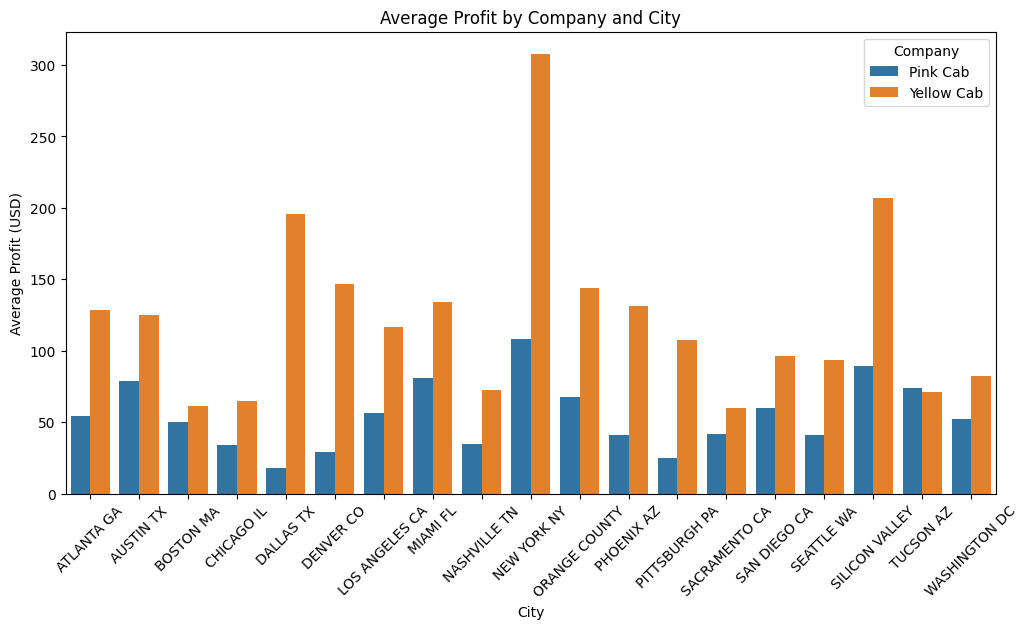

In [7]:
# Calculate profitability
taxi_data['Profit'] = taxi_data['Price Charged'] - taxi_data['Cost of Trip']

# Group by company and city to get average profit
profit_by_company_city = taxi_data.groupby(['Company', 'City'])['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Profit', hue='Company', data=profit_by_company_city)
plt.title('Average Profit by Company and City')
plt.xlabel('City')
plt.ylabel('Average Profit (USD)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()



###  Is there a significant difference in profitability between different payment modes?

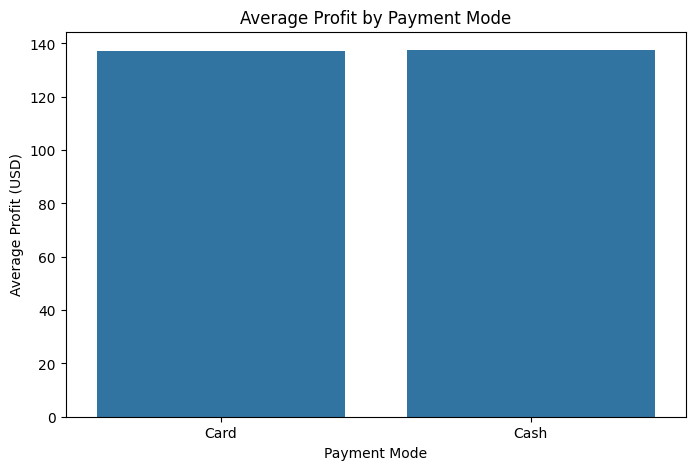

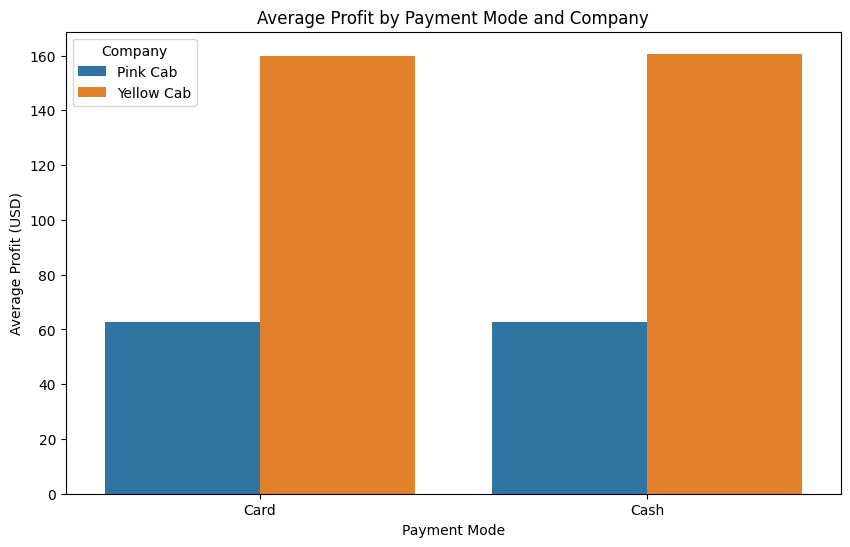

In [8]:
# Merge transaction_data with taxi_data
merged_data = pd.merge(transaction_data, taxi_data, on='Transaction ID')

# Calculate profitability
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']

# Group by payment mode to get average profit
profit_by_payment_mode = merged_data.groupby('Payment_Mode')['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Payment_Mode', y='Profit', data=profit_by_payment_mode)
plt.title('Average Profit by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Average Profit (USD)')
plt.show()

# Group by payment mode and company to get average profit
profit_by_payment_mode_company = merged_data.groupby(['Payment_Mode', 'Company'])['Profit'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_Mode', y='Profit', hue='Company', data=profit_by_payment_mode_company)
plt.title('Average Profit by Payment Mode and Company')
plt.xlabel('Payment Mode')
plt.ylabel('Average Profit (USD)')
plt.legend(title='Company')
plt.show()



## Average Price of Trips Per City

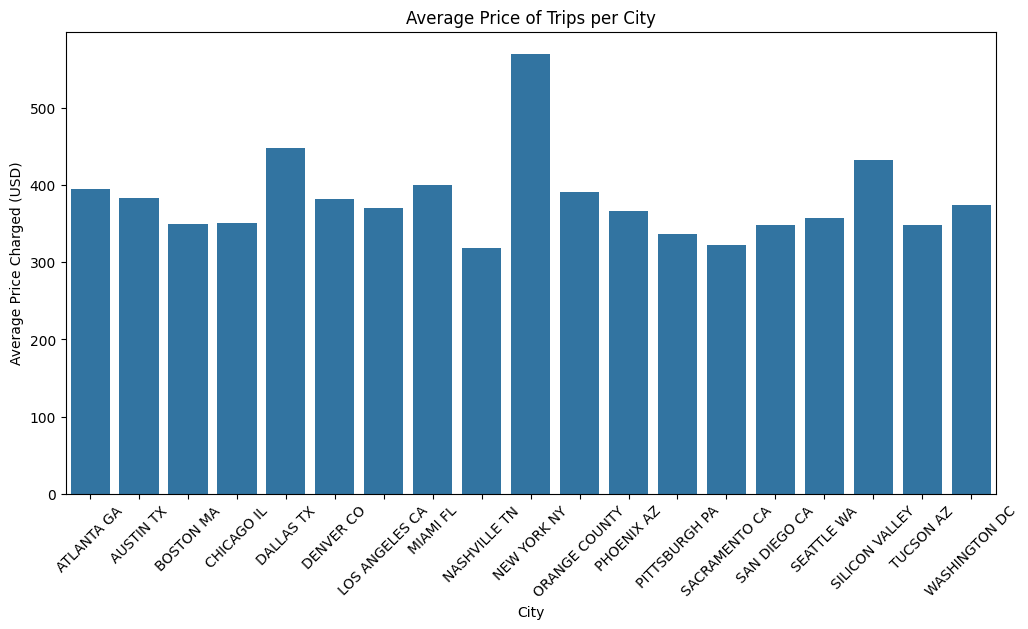

In [9]:
# Calculate average price of trips per city
avg_price_per_city = taxi_data.groupby('City')['Price Charged'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Price Charged', data=avg_price_per_city)
plt.title('Average Price of Trips per City')
plt.xlabel('City')
plt.ylabel('Average Price Charged (USD)')
plt.xticks(rotation=45)
plt.show()



### Question 4: How efficient are cab companies in terms of distance traveled per trip, and how does it vary across cities?

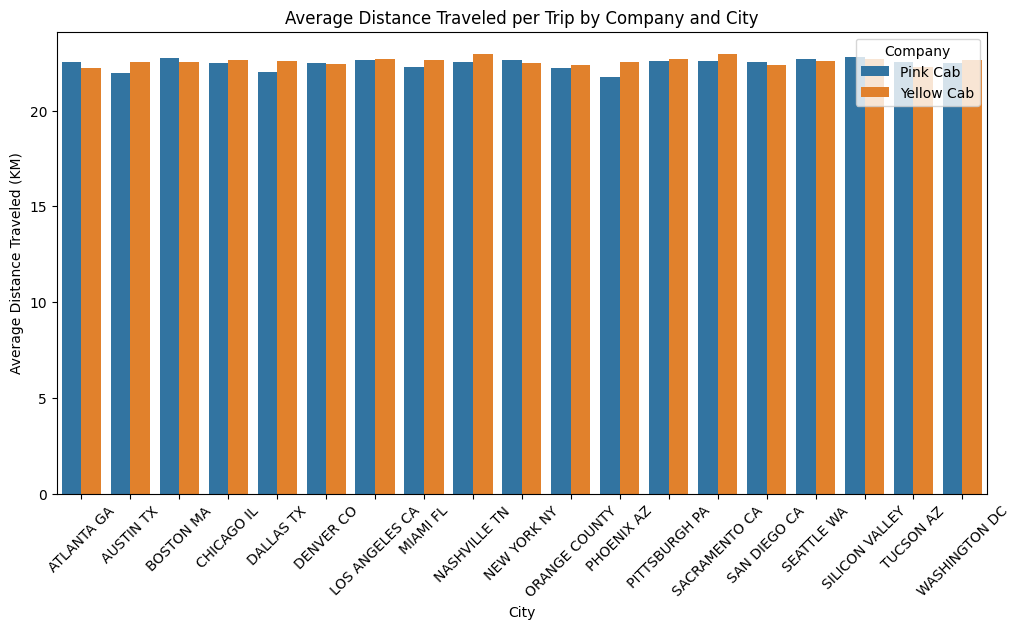

In [10]:
# Calculate average distance traveled per trip
avg_distance_per_trip = taxi_data.groupby(['Company', 'City'])['Distance Travelled(KM)'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Distance Travelled(KM)', hue='Company', data=avg_distance_per_trip)
plt.title('Average Distance Traveled per Trip by Company and City')
plt.xlabel('City')
plt.ylabel('Average Distance Traveled (KM)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()


### What are the characteristics of the top 10% of customers by spending on taxi services?

Characteristics of the Top 10% of Customers by Spending on Taxi Services:
                Age  Income (USD/Month)
count  35948.000000        35948.000000
mean      35.583760        15455.790698
std       12.871728         7826.960037
min       18.000000         2012.000000
25%       25.000000         8911.000000
50%       33.000000        15614.000000
75%       45.000000        21263.000000
max       65.000000        34953.000000


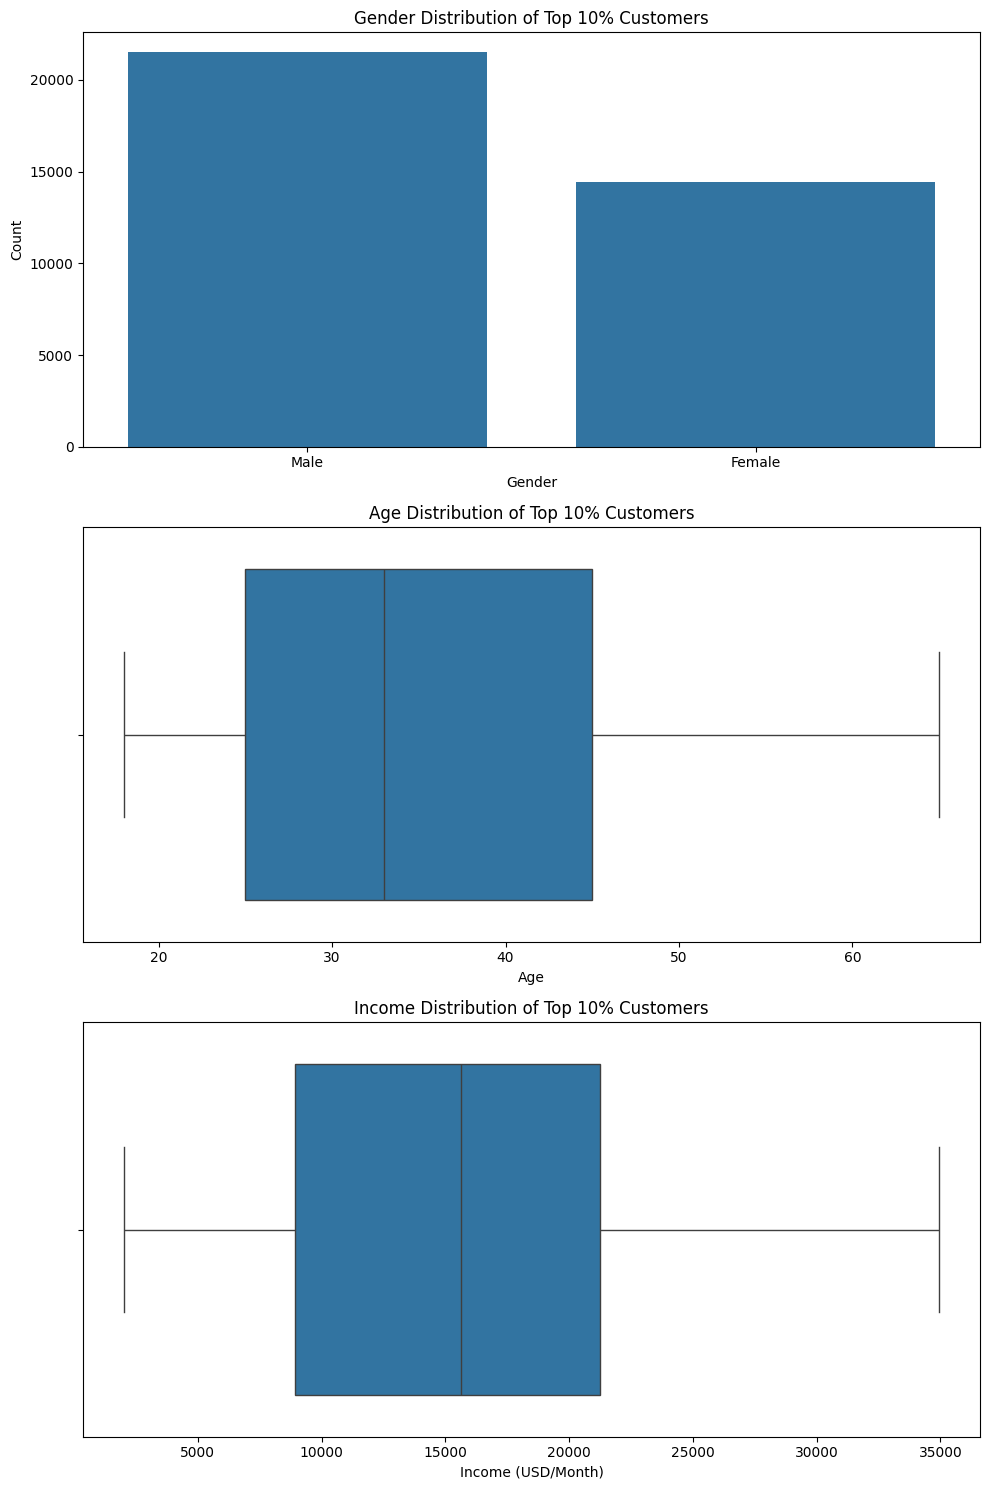

In [11]:
# Merge necessary datasets
merged_data = pd.merge(pd.merge(taxi_data, transaction_data, on='Transaction ID'), customer_data, on='Customer ID')

# Calculate spending per customer
merged_data['Total Spending'] = merged_data.groupby('Customer ID')['Price Charged'].transform('sum')

# Identify top 10% of customers by spending
top_10_percent_customers = merged_data[merged_data['Total Spending'] >= merged_data['Total Spending'].quantile(0.9)]

# Descriptive statistics on demographics of top-spending customers
top_10_percent_customers_demographics = top_10_percent_customers[['Gender', 'Age', 'Income (USD/Month)']]

# Descriptive statistics
top_10_percent_customers_stats = top_10_percent_customers_demographics.describe()

# Print descriptive statistics
print("Characteristics of the Top 10% of Customers by Spending on Taxi Services:")
print(top_10_percent_customers_stats)

# Set up figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot gender distribution
sns.countplot(x='Gender', data=top_10_percent_customers_demographics, ax=axes[0])
axes[0].set_title('Gender Distribution of Top 10% Customers')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot age distribution
sns.boxplot(x='Age', data=top_10_percent_customers_demographics, ax=axes[1])
axes[1].set_title('Age Distribution of Top 10% Customers')
axes[1].set_xlabel('Age')

# Plot income distribution
sns.boxplot(x='Income (USD/Month)', data=top_10_percent_customers_demographics, ax=axes[2])
axes[2].set_title('Income Distribution of Top 10% Customers')
axes[2].set_xlabel('Income (USD/Month)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



## Ayan's Section